For questions 1 to 3:

Perform a linear regression to predict Y from X1, X2, and X3. Use the file homework_1.1.csv.


Which of the following is closest to the coefficient of X1? 

Option A
3

Option B
1



Which Xi has the greatest difference between the amount Y increases for each 1 unit of Xi (fixing the other Xi’s), as opposed to the amount that Y increases for each 1 unit of Xi in the dataset, on average (not fixing the other Xis)? Hint: for the former, you'll have to regress Y on Xi alone, while for the latter, you'll have to regress Y on all three Xis. 

Option A
X2

Option B
X3

Option C
X1


Question 3
6
 Points
Question 3
When regressing Y on all Xis together, which coefficient is most significant, considering the t-statistic as a measure of significance? 

Option A
X1 

Option B
X2 

Option C
X3

In [2]:
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 40.1 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [statsmodels] [statsmodels]

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("homework_1.1.csv")

# Separate predictors and target
X = df[["X1", "X2", "X3"]]
y = df["Y"]

# Add constant (intercept)
X = sm.add_constant(X)

# Fit regression model
model = sm.OLS(y, X).fit()

# Show results
print(model.summary())

# If you just want the coefficients directly:
print("Coefficients:")
print(model.params)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 3.543e+04
Date:                Mon, 06 Oct 2025   Prob (F-statistic):               0.00
Time:                        02:51:51   Log-Likelihood:                -727.62
No. Observations:                1000   AIC:                             1463.
Df Residuals:                     996   BIC:                             1483.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0026      0.016      0.166      0.8

In [6]:
X = df[["X1", "X2", "X3"]]
y = df["Y"]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.params

const    0.002643
X1       1.007138
X2       1.964569
X3       2.975489
dtype: float64

QUESTION 2

In [7]:
for col in ["X1", "X2", "X3"]:
    X_single = sm.add_constant(df[[col]])
    model_single = sm.OLS(y, X_single).fit()
    print(f"{col} simple regression coefficient: {model_single.params[col]}")

X1 simple regression coefficient: 1.841761099171514
X2 simple regression coefficient: 4.083612579423011
X3 simple regression coefficient: 3.097041202043796


In [8]:
X = sm.add_constant(df[["X1", "X2", "X3"]])
model_multi = sm.OLS(y, X).fit()
print(model_multi.params)

const    0.002643
X1       1.007138
X2       1.964569
X3       2.975489
dtype: float64


QUESTION 3 - When regressing Y on all Xis together, which coefficient is most significant, considering the t-statistic as a measure of significance? 



In [9]:
X = sm.add_constant(df[["X1", "X2", "X3"]])
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 3.543e+04
Date:                Sun, 14 Sep 2025   Prob (F-statistic):               0.00
Time:                        22:33:16   Log-Likelihood:                -727.62
No. Observations:                1000   AIC:                             1463.
Df Residuals:                     996   BIC:                             1483.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0026      0.016      0.166      0.8

For Question 4 and 5: Use NearestNeighbors to match data based on variables Z, given the file homework_1.2.csv. Pick the best match in X = 0 corresponding to each X = 1. Use the Z values to perform the match: a good match with X = 1 is the item whose Z value is closest to the given sample's Z value with X = 0. I suggest using sklearn's NearestNeighbors to do this, but there are many ways to do it. 

Question 4 

What is the distance of the farthest match in this set? 




In [5]:
# Load the data
df2 = pd.read_csv("homework_1.2.csv")   # columns: X, Y, Z

# Split into treatment (X=1) and control (X=0)
treat = df2[df2["X"] == 1].reset_index(drop=True)
ctrl  = df2[df2["X"] == 0].reset_index(drop=True)

# Arrays for matching
Z_treat = treat[["Z"]].values
Z_ctrl  = ctrl[["Z"]].values

In [6]:
# Fit NearestNeighbors on control (X=0)
nn = NearestNeighbors(n_neighbors=1, algorithm="auto").fit(Z_ctrl)

# Find best match in control for each treatment Z
distances, indices = nn.kneighbors(Z_treat)

# Farthest match distance (max over all matches)
farthest_match = float(distances.max())
print("Q4 - Farthest match distance:", farthest_match)

Q4 - Farthest match distance: 0.2102170871093757


Question 5 What is the effect? (The difference between the average Y value for X = 0 values vs. the average Y value for X = 1, where the X = 0 sample has the best match for each X = 1 value). So we use the matched sample of X = 0 and the full sample of X = 1.

In [13]:
# Get matched control rows corresponding to each treatment
matched_ctrl = ctrl.iloc[indices.flatten()].reset_index(drop=True)

# Average Y in treatment group
avg_treat = float(treat["Y"].mean())

# Average Y in matched control group
avg_ctrl_matched = float(matched_ctrl["Y"].mean())

# Effect = difference
effect = avg_treat - avg_ctrl_matched
print("Q5 - Treatment effect:", effect)


Q5 - Treatment effect: 0.5433600652185839


For questions 6 and 7: Use NearestNeighbors to match data based on variables Z, given the file homework_1.2.csv. Try approach B: Pick all of the matches in X = 0 that are within a distance 0.2 of each X = 1. Duplicates are okay, in case a given sample with X = 0 is a good match for multiple items with X = 1. 


6) How many duplicates do you end up with? (Count all but the first duplicate in each group. One way to do this is to use radius_neighbors.)

In [14]:
# Split treatment (X=1) and control (X=0)
treat = df2[df2["X"] == 1].reset_index(drop=True)
ctrl  = df2[df2["X"] == 0].reset_index(drop=True)

# Arrays for matching on Z
Z_treat = treat[["Z"]].values
Z_ctrl  = ctrl[["Z"]].values

In [18]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
from collections import Counter

# Load data
df2 = pd.read_csv("homework_1.2.csv")

# Make sure columns exist and are numeric
expected_cols = {"X","Y","Z"}
missing = expected_cols - set(df2.columns)
if missing:
    raise KeyError(f"Missing columns: {missing}. Found columns: {list(df2.columns)}")

for c in ["X","Y","Z"]:
    df2[c] = pd.to_numeric(df2[c], errors="coerce")

# Drop rows with NaNs in needed cols
df2 = df2.dropna(subset=["X","Y","Z"]).reset_index(drop=True)

# Split groups
treat = df2[df2["X"] == 1].reset_index(drop=True)
ctrl  = df2[df2["X"] == 0].reset_index(drop=True)

print(f"Rows total={len(df2)}, treat={len(treat)}, ctrl={len(ctrl)}")

if len(treat) == 0 or len(ctrl) == 0:
    raise ValueError("Need both treatment (X=1) and control (X=0) rows to proceed.")

# Arrays for matching (1D feature: Z)
Z_treat = treat[["Z"]].values
Z_ctrl  = ctrl[["Z"]].values

print("Shapes -> Z_treat:", Z_treat.shape, "Z_ctrl:", Z_ctrl.shape)


Rows total=100, treat=48, ctrl=52
Shapes -> Z_treat: (48, 1) Z_ctrl: (52, 1)


In [19]:
# Fit radius neighbors on control
radius = 0.2
nn = NearestNeighbors(radius=radius, algorithm="auto")
nn.fit(Z_ctrl)

# Find neighbors for each treatment point
dist_lists, idx_lists = nn.radius_neighbors(Z_treat, return_distance=True)

# Flatten all matched control indices (some groups may be empty)
all_ctrl_indices = np.concatenate(idx_lists) if len(idx_lists) and any(len(ix)>0 for ix in idx_lists) else np.array([], dtype=int)

# Count reuse of control indices
counts = Counter(all_ctrl_indices)
duplicates = sum(max(0, c - 1) for c in counts.values())
print(f"Q6 - Number of duplicates (radius={radius}):", duplicates)

# (Optional) show which control rows were reused
reused = {k:v for k,v in counts.items() if v > 1}
if reused:
    print("Control rows reused (>1 use):", reused)
else:
    print("No control rows reused.")


Q6 - Number of duplicates (radius=0.2): 685
Control rows reused (>1 use): {np.int64(0): 21, np.int64(1): 21, np.int64(2): 21, np.int64(4): 21, np.int64(5): 19, np.int64(9): 28, np.int64(12): 21, np.int64(17): 20, np.int64(20): 21, np.int64(21): 22, np.int64(25): 22, np.int64(31): 22, np.int64(35): 25, np.int64(41): 19, np.int64(43): 21, np.int64(45): 19, np.int64(48): 23, np.int64(15): 19, np.int64(27): 19, np.int64(34): 20, np.int64(3): 17, np.int64(13): 16, np.int64(14): 16, np.int64(18): 17, np.int64(26): 15, np.int64(28): 15, np.int64(37): 16, np.int64(39): 16, np.int64(42): 16, np.int64(46): 16, np.int64(22): 12, np.int64(24): 12, np.int64(49): 11, np.int64(6): 5, np.int64(7): 5, np.int64(8): 5, np.int64(10): 8, np.int64(11): 8, np.int64(16): 5, np.int64(19): 5, np.int64(23): 7, np.int64(29): 8, np.int64(30): 7, np.int64(32): 7, np.int64(33): 6, np.int64(36): 5, np.int64(38): 8, np.int64(40): 5, np.int64(44): 6, np.int64(47): 8, np.int64(50): 5, np.int64(51): 5}


7) What is the effect? (Note: to compute the effect, you should take the mean of the Y values in each neighbor group, then average the Y for each group.)



In [21]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

radius = 0.2

# Make sure we have Z arrays
Z_treat = treat[["Z"]].values
Z_ctrl  = ctrl[["Z"]].values

# Radius neighbors on control
nn = NearestNeighbors(radius=radius, algorithm="auto").fit(Z_ctrl)
dist_lists, idx_lists = nn.radius_neighbors(Z_treat, return_distance=True)


In [22]:
group_ctrl_means = []
matched_treat_Y  = []

for i, inds in enumerate(idx_lists):
    # inds = indices into control rows that are within radius of treat[i] in Z
    if len(inds) == 0:
        continue  # skip treatment rows with no control neighbors

    ctrl_mean_y = ctrl.iloc[inds]["Y"].mean()
    group_ctrl_means.append(ctrl_mean_y)
    matched_treat_Y.append(treat.iloc[i]["Y"])


In [23]:
group_ctrl_means = np.array(group_ctrl_means, dtype=float)
matched_treat_Y  = np.array(matched_treat_Y, dtype=float)

if matched_treat_Y.size == 0:
    raise ValueError(f"No treatment rows had any control neighbors within radius={radius}. Try a larger radius (e.g., 0.3).")

avg_ctrl  = group_ctrl_means.mean()    # average of group control means
avg_treat = matched_treat_Y.mean()     # average Y over matched treatment rows
effect = avg_treat - avg_ctrl

print("Q7 - Treatment effect (matched groups):", effect)
print("  Groups matched:", matched_treat_Y.size)
print("  Avg Y (treat, matched groups):", avg_treat)
print("  Avg of group control means:", avg_ctrl)


Q7 - Treatment effect (matched groups): 0.5688516534127853
  Groups matched: 46
  Avg Y (treat, matched groups): 1.1100363138620082
  Avg of group control means: 0.5411846604492229


In [24]:
import numpy as np

# assumes you already have: treat, ctrl, idx_lists (neighbors within radius)

# Unweighted (your method)
group_ctrl_means = [ctrl.iloc[inds]["Y"].mean() for inds in idx_lists if len(inds) > 0]
matched_treat_Y  = [treat.iloc[i]["Y"]          for i, inds in enumerate(idx_lists) if len(inds) > 0]
effect_unweighted = np.mean(matched_treat_Y) - np.mean(group_ctrl_means)
print("Effect (unweighted group means):", effect_unweighted)

# Weighted (pooled across all matched controls)
pooled_ctrl = np.concatenate([ctrl.iloc[inds]["Y"].values for inds in idx_lists if len(inds) > 0])
effect_weighted = np.mean(matched_treat_Y) - np.mean(pooled_ctrl)
print("Effect (weighted / pooled):     ", effect_weighted)


Effect (unweighted group means): 0.5688516534127853
Effect (weighted / pooled):      0.6700103529275369


Reflection Q1

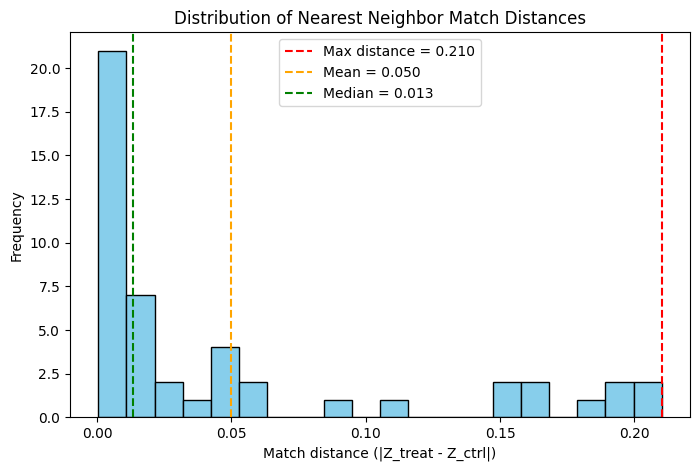

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you already have distances from:
# distances, indices = nn.kneighbors(Z_treat)

# Flatten distances into a 1D array
match_distances = distances.flatten()

# Calculate key stats
max_dist = match_distances.max()
mean_dist = match_distances.mean()
median_dist = np.median(match_distances)

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(match_distances, bins=20, color='skyblue', edgecolor='black')
plt.axvline(max_dist, color='red', linestyle='--', label=f'Max distance = {max_dist:.3f}')
plt.axvline(mean_dist, color='orange', linestyle='--', label=f'Mean = {mean_dist:.3f}')
plt.axvline(median_dist, color='green', linestyle='--', label=f'Median = {median_dist:.3f}')
plt.xlabel("Match distance (|Z_treat - Z_ctrl|)")
plt.ylabel("Frequency")
plt.title("Distribution of Nearest Neighbor Match Distances")
plt.legend()
plt.show()


In [8]:
df2["Z"].mean(), df2["Z"].std()


(np.float64(0.4727938395150978), np.float64(0.2897540152400463))

In [9]:
z_min = df2["Z"].min()
z_max = df2["Z"].max()
z_range = z_max - z_min

print(f"Z min: {z_min:.3f}")
print(f"Z max: {z_max:.3f}")
print(f"Range of Z: {z_range:.3f}")

Z min: 0.005
Z max: 0.988
Range of Z: 0.984


2. Write a Python program that performs a bootstrap simulation to find the variance in the mean of the Pareto distribution when different samples are taken.  Explain what you had to do for this.  As you make the full sample size bigger (for the same distribution), what happens to the variance of the mean of the samples?  Does it stay about the same, get smaller, or get bigger?


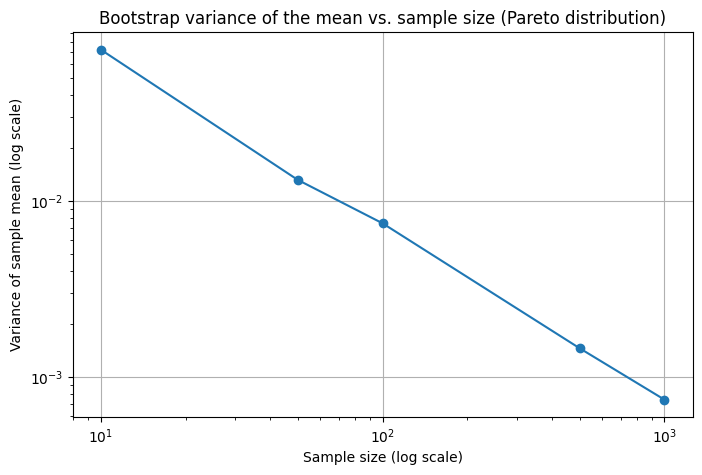

Sample size = 10, Variance of mean = 0.072097
Sample size = 50, Variance of mean = 0.013118
Sample size = 100, Variance of mean = 0.007430
Sample size = 500, Variance of mean = 0.001450
Sample size = 1000, Variance of mean = 0.000740


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the Pareto distribution
alpha = 3  # shape parameter (higher = less skewed)
n_samples = 10000  # number of bootstrap repetitions

def bootstrap_variance(sample_size):
    means = []
    for _ in range(n_samples):
        # Draw a sample from Pareto(alpha)
        sample = np.random.pareto(alpha, sample_size)
        # Store the sample mean
        means.append(np.mean(sample))
    return np.var(means)

# Try different sample sizes
sample_sizes = [10, 50, 100, 500, 1000]
variances = [bootstrap_variance(n) for n in sample_sizes]

# Plot the results
plt.figure(figsize=(8,5))
plt.plot(sample_sizes, variances, marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Sample size (log scale)')
plt.ylabel('Variance of sample mean (log scale)')
plt.title('Bootstrap variance of the mean vs. sample size (Pareto distribution)')
plt.grid(True)
plt.show()

for n, var in zip(sample_sizes, variances):
    print(f"Sample size = {n}, Variance of mean = {var:.6f}")


In [6]:
import numpy as np

alpha = 3.0          # Pareto shape parameter
sample_size = 100    # number of draws in each sample
n_boot = 10_000      # number of bootstrap samples

# Bootstrapping: repeat sampling and store the sample mean each time ---
means = []
rng = np.random.default_rng(0)  
for _ in range(n_boot):
    sample = rng.pareto(alpha, size=sample_size) 
    means.append(sample.mean())                    

means = np.array(means)

# Calculate variance of the sample mean across bootstrap replications
variance = np.var(means, ddof=1) 
print(f"Bootstrap variance of the sample mean (n={sample_size}): {variance:.6f}")


Bootstrap variance of the sample mean (n=100): 0.007239


Bootstrap variance of the sample mean (n=100): 0.007239


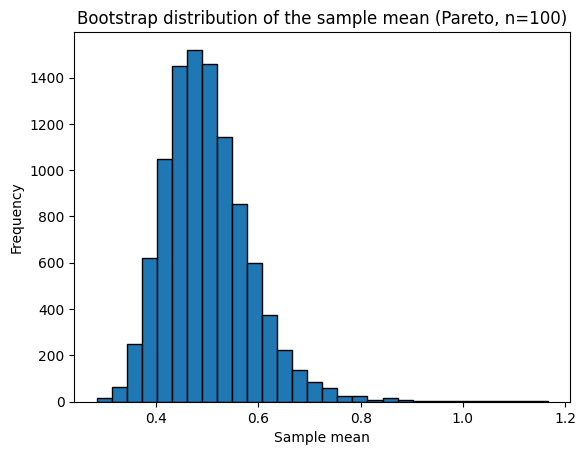

In [ ]:
import matplotlib.pyplot as plt



# --- (Optional) visualize the bootstrap distribution of the mean ---
plt.hist(means, bins=30, edgecolor="black")
plt.xlabel("Sample mean")
plt.ylabel("Frequency")
plt.title(f"Bootstrap distribution of the sample mean (Pareto, n={sample_size})")
plt.show()

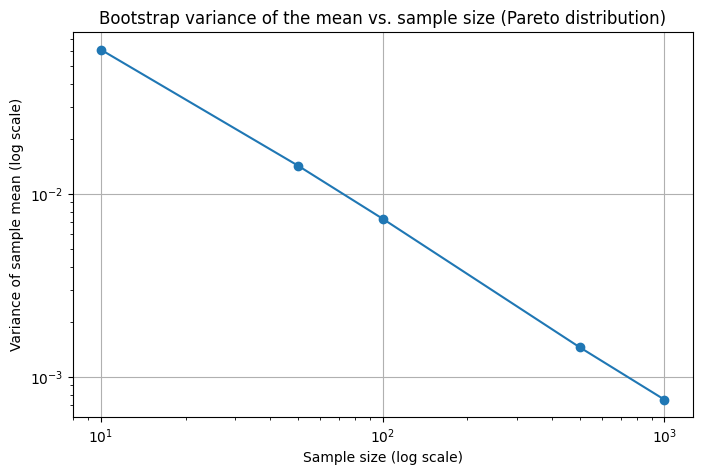

Sample size = 10, Variance of mean = 0.061427
Sample size = 50, Variance of mean = 0.014292
Sample size = 100, Variance of mean = 0.007318
Sample size = 500, Variance of mean = 0.001453
Sample size = 1000, Variance of mean = 0.000751


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the Pareto distribution
alpha = 3  
n_samples = 10000  # number of bootstrap repetitions

#function that calculates the variance 
def bootstrap_variance(sample_size):
    means = []
    for _ in range(n_samples):
        sample = np.random.pareto(alpha, sample_size)
        means.append(np.mean(sample))
    return np.var(means)

# Trying different sample sizes
sample_sizes = [10, 50, 100, 500, 1000]
variances = [bootstrap_variance(n) for n in sample_sizes]

# Plot the results
plt.figure(figsize=(8,5))
plt.plot(sample_sizes, variances, marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Sample size (log scale)')
plt.ylabel('Variance of sample mean (log scale)')
plt.title('Bootstrap variance of the mean vs. sample size (Pareto distribution)')
plt.grid(True)
plt.show()

for n, var in zip(sample_sizes, variances):
    print(f"Sample size = {n}, Variance of mean = {var:.6f}")
